In [8]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# --- Data Collection and Loading ---
# Load Boston Housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# Reconstruct features and target
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# Define feature names (manually, since they are not in the dataset)
feature_names = [
"CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
"RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
# Create the DataFrame
df = pd.DataFrame(data, columns=feature_names)
df["MEDV"] = target

In [10]:
# --- Quick Check of Data ---
# Display the first few rows
print(df.head())
# Check data types and summary
print(df.info())
print(df.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-nu

In [11]:
# --- EDA and Data Preprocessing ---
# Check for missing/null values
print("Missing values:\n", df.isnull().sum())

Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


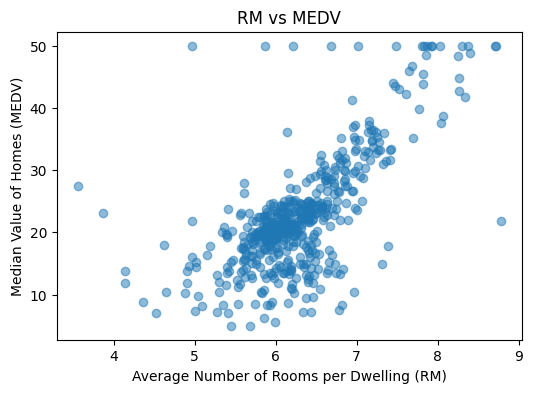

In [12]:
# Visualize one feature (e.g., RM vs MEDV)
plt.figure(figsize=(6, 4))
plt.scatter(df['RM'], df['MEDV'], alpha=0.5)
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('RM vs MEDV')
plt.show()

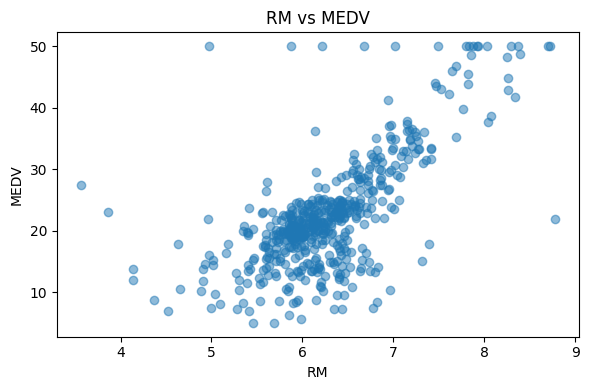

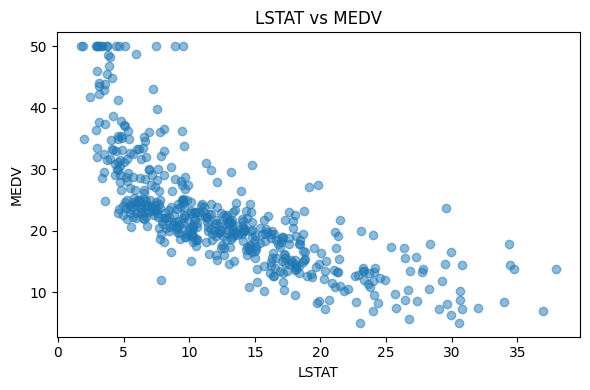

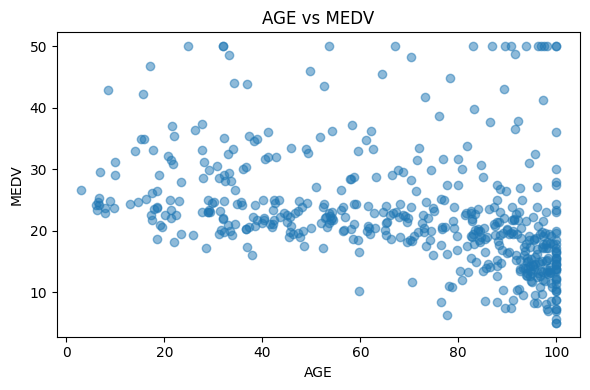

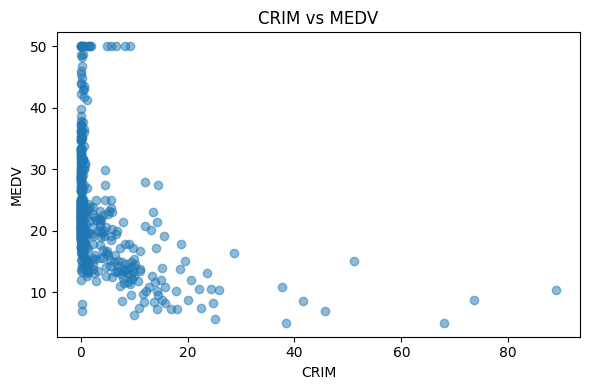

In [14]:
# Function to automate scatter plots
def plot_feature_vs_target(features, target='MEDV', df=None):
    for feature in features:
        plt.figure(figsize=(6, 4))
        plt.scatter(df[feature], df[target], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f'{feature} vs {target}')
        plt.tight_layout()
        plt.show()

# Example usage: Use the function for selected features
# Make sure df is defined and contains the required columns
plot_feature_vs_target(['RM', 'LSTAT', 'AGE', 'CRIM'], target='MEDV', df=df)


In [15]:
# --- ML Model Training ---
X = df.drop(columns='MEDV')
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the model
model = RandomForestRegressor(random_state=42)
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# --- Model Evaluation ---
# Predictions
y_pred = model.predict(X_test)
# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Root Mean Squared Error (RMSE): 2.8110
R-squared (R2): 0.8923


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',  # Corrected scoring key
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Model RMSE: {rmse_best:.4f}")
print(f"Tuned Model R²: {r2_best:.4f}")


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model RMSE: 2.7855
Tuned Model R²: 0.8942
